In [1]:
from Simulation import *
from Geometry import *
from mie_data import mie_10nm
from mie_data import mie_40nm

# Mie Theory Verification

In [2]:
wavelength_list = np.linspace(400,700,30)

## 10 nm radius 

In [3]:
%%time
mesh = Nanosphere(10,0,300,600)
sim10nm = Simulation(mesh)
sim10nm.RefineMesh()

DoF:  126435
Max Error:  0.8852706333470328
DoF:  243076
Max Error:  0.2652403583383671
DoF:  294898
Max Error:  0.16589977519717428
DoF:  361058
Max Error:  0.2668991260053699
DoF:  377127
Max Error:  0.17993164595616612
Wall time: 9min 8s


In [4]:
%%time
ext_list10nm = np.array([(wavelength,sim10nm.Extinction(wavelength)) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  410.3448275862069
Wavelength:  420.6896551724138
Wavelength:  431.0344827586207
Wavelength:  441.37931034482756
Wavelength:  451.7241379310345
Wavelength:  462.0689655172414
Wavelength:  472.41379310344826
Wavelength:  482.7586206896552
Wavelength:  493.1034482758621
Wavelength:  503.44827586206895
Wavelength:  513.7931034482758
Wavelength:  524.1379310344828
Wavelength:  534.4827586206897
Wavelength:  544.8275862068965
Wavelength:  555.1724137931035
Wavelength:  565.5172413793103
Wavelength:  575.8620689655172
Wavelength:  586.2068965517242
Wavelength:  596.551724137931
Wavelength:  606.8965517241379
Wavelength:  617.2413793103449
Wavelength:  627.5862068965517
Wavelength:  637.9310344827586
Wavelength:  648.2758620689656
Wavelength:  658.6206896551724
Wavelength:  668.9655172413793
Wavelength:  679.3103448275863
Wavelength:  689.6551724137931
Wavelength:  700.0
Wall time: 21min 12s


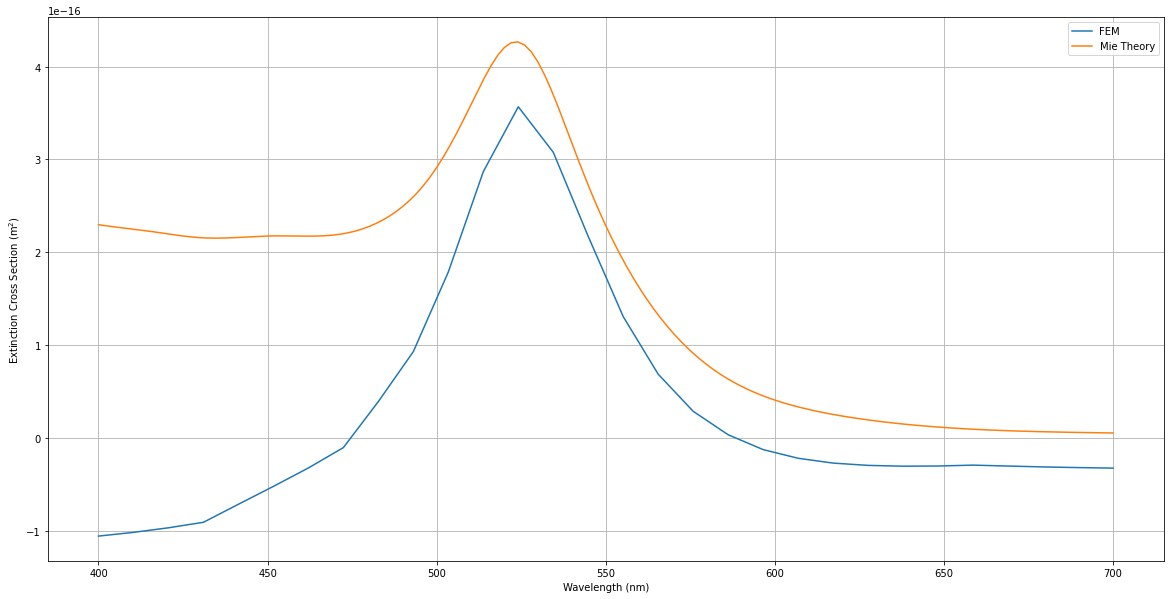

In [5]:
plt.figure(figsize=(20,10))
plt.plot(ext_list10nm[:,0],-ext_list10nm[:,1],label="FEM")
plt.plot(mie_10nm[:,0]*1e+9,mie_10nm[:,1],label="Mie Theory")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Extinction Cross Section (m$^2$)")
plt.grid()
plt.legend()
plt.show()

## 40 nm radius

In [6]:
%%time
mesh = Nanosphere(40,0,300,600)
sim40nm = Simulation(mesh)
sim40nm.RefineMesh()

DoF:  104868
Max Error:  5.39232903968863
DoF:  132799
Max Error:  1.5318547215732496
DoF:  190208
Max Error:  1.3053367599229855
DoF:  234257
Max Error:  1.1384688297085555
DoF:  254039
Max Error:  0.6062383925323491
DoF:  313184
Max Error:  1.9798849506469316
DoF:  318597
Max Error:  1.8481338550709645
Wall time: 9min 36s


In [7]:
%%time
ext_list40nm = np.array([(wavelength,sim40nm.Extinction(wavelength)) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  403.0
Wavelength:  406.0
Wavelength:  409.0
Wavelength:  412.0
Wavelength:  415.0
Wavelength:  418.0
Wavelength:  421.0
Wavelength:  424.0
Wavelength:  427.0
Wavelength:  430.0
Wavelength:  433.0
Wavelength:  436.0
Wavelength:  439.0
Wavelength:  442.0
Wavelength:  445.0
Wavelength:  448.0
Wavelength:  451.0
Wavelength:  454.0
Wavelength:  457.0
Wavelength:  460.0
Wavelength:  463.0
Wavelength:  466.0
Wavelength:  469.0
Wavelength:  472.0
Wavelength:  475.0
Wavelength:  478.0
Wavelength:  481.0
Wavelength:  484.0
Wavelength:  487.0
Wavelength:  490.0
Wavelength:  493.0
Wavelength:  496.0
Wavelength:  499.0
Wavelength:  502.0
Wavelength:  505.0
Wavelength:  508.0
Wavelength:  511.0
Wavelength:  514.0
Wavelength:  517.0
Wavelength:  520.0
Wavelength:  523.0
Wavelength:  526.0
Wavelength:  529.0
Wavelength:  532.0
Wavelength:  535.0
Wavelength:  538.0
Wavelength:  541.0
Wavelength:  544.0
Wavelength:  547.0
Wavelength:  550.0
Wavelength:  553.0
Wavelength: 

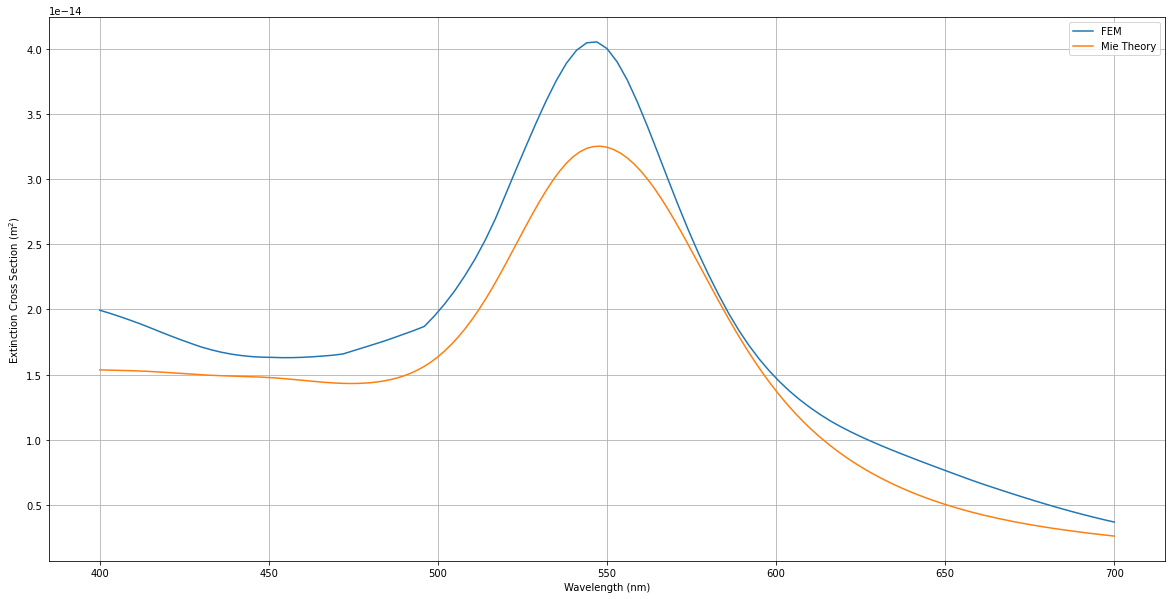

In [8]:
plt.figure(figsize=(20,10))
plt.plot(ext_list40nm[:,0],-ext_list40nm[:,1],label="FEM")
plt.plot(mie_40nm[:,0]*1e+9,mie_40nm[:,1],label="Mie Theory")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Extinction Cross Section (m$^2$)")
plt.grid()
plt.legend()
plt.show()

# Model Verification

## 10nm Microtubules

In [14]:
%%time
mesh_radial = Nanosphere(40, 10, 300, 600, mt_model="radial")
sim_radial = Simulation(mesh_radial)
sim_radial.RefineMesh(percentage=.3)

DoF:  31380
Max Error:  3.1286863914019074


KeyboardInterrupt: 

In [10]:
%%time
mesh_cylinder = Nanosphere(40, 10, 300, 600, mt_model="cylinder")
sim_cylinder = Simulation(mesh_cylinder)
sim_cylinder.RefineMesh()

DoF:  143736
Max Error:  6.860739822228391
DoF:  193610
Max Error:  2.2895126833634922
DoF:  233847
Max Error:  3.1574208197054836
DoF:  308832
Max Error:  2.1492926753578083
DoF:  561475
Max Error:  3.0791026153411125
DoF:  609429
Max Error:  2.991263085888792
DoF:  652523
Max Error:  2.9371425526945574
Wall time: 20min 34s


In [ ]:
%%time
ext_list_radial = np.array([sim_radial.Extinction(wavelength) for wavelength in wavelength_list])

In [12]:
%%time 
ext_list_cylinder = np.array([sim_cylinder.Extinction(wavelength) for wavelength in wavelength_list])

Wavelength:  400.0
Wavelength:  403.0
Wavelength:  406.0
Wavelength:  409.0
Wavelength:  412.0
Wavelength:  415.0
Wavelength:  418.0
Wavelength:  421.0
Wavelength:  424.0
Wavelength:  427.0
Wavelength:  430.0
Wavelength:  433.0
Wavelength:  436.0
Wavelength:  439.0
Wavelength:  442.0
Wavelength:  445.0
Wavelength:  448.0
Wavelength:  451.0
Wavelength:  454.0
Wavelength:  457.0
Wavelength:  460.0
Wavelength:  463.0
Wavelength:  466.0
Wavelength:  469.0
Wavelength:  472.0
Wavelength:  475.0
Wavelength:  478.0
Wavelength:  481.0
Wavelength:  484.0
Wavelength:  487.0
Wavelength:  490.0
Wavelength:  493.0
Wavelength:  496.0
Wavelength:  499.0
Wavelength:  502.0
Wavelength:  505.0
Wavelength:  508.0
Wavelength:  511.0
Wavelength:  514.0
Wavelength:  517.0
Wavelength:  520.0
Wavelength:  523.0
Wavelength:  526.0
Wavelength:  529.0
Wavelength:  532.0
Wavelength:  535.0
Wavelength:  538.0
Wavelength:  541.0
Wavelength:  544.0
Wavelength:  547.0
Wavelength:  550.0
Wavelength:  553.0
Wavelength: 

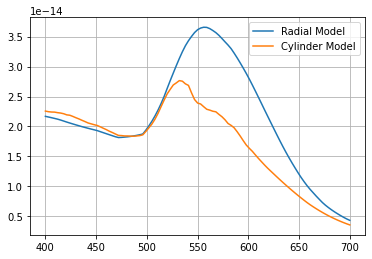

In [13]:
plt.figure()
plt.plot(wavelength_list,-ext_list_radial,label="Radial Model")
plt.plot(wavelength_list,-ext_list_cylinder,label="Cylinder Model")
plt.grid()
plt.legend()
plt.show()
